In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets
import matplotlib.pyplot as plt

from s7_datasets import load_data_S7_1
from models import model_summary,S7_Model_2
from utils import train_S7,test_S7,plot_acc_loss_S7

c:\Users\Aai\anaconda3\envs\pytorch\Lib\site-packages\torchvision\io\image.py:13: UserWarning: Failed to load image Python extension: '[WinError 127] The specified procedure could not be found'If you don't plan on using image functionality from `torchvision.io`, you can ignore this warning. Otherwise, there might be something wrong with your environment. Did you have `libjpeg` or `libpng` installed before building `torchvision` from source?
  warn(
c:\Users\Aai\anaconda3\envs\pytorch\Lib\site-packages\transformers\utils\generic.py:441: UserWarning: torch.utils._pytree._register_pytree_node is deprecated. Please use torch.utils._pytree.register_pytree_node instead.
  _torch_pytree._register_pytree_node(


In [2]:
use_cuda = torch.cuda.is_available()  # Check if CUDA (GPU support) is available
device = torch.device("cuda" if use_cuda else "cpu")  # Select GPU if available, otherwise fall back to CPU
device  # Display the selected device

device(type='cpu')

In [3]:
train_loader , test_loader = load_data_S7_1()

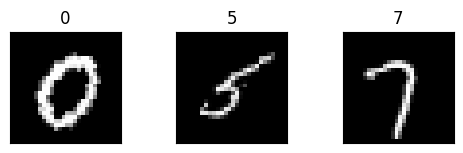

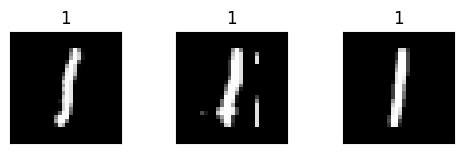

In [4]:
def plot_image(loader,no_images):
    batch_data, batch_label = next(iter(loader))
    _ = plt.figure()

    for i in range(no_images):
        plt.subplot(3,4,i+1)
        plt.tight_layout()
        plt.imshow(batch_data[i].squeeze(0), cmap='gray')
        plt.title(batch_label[i].item())
        plt.xticks([])
        plt.yticks([])


plot_image(train_loader,3)
plot_image(test_loader,3)

In [5]:
model = S7_Model_2()
model_summary(model,input_size=(1,28,28))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 32, 28, 28]           1,568
       BatchNorm2d-2           [-1, 32, 28, 28]              64
              ReLU-3           [-1, 32, 28, 28]               0
           Dropout-4           [-1, 32, 28, 28]               0
         MaxPool2d-5           [-1, 32, 14, 14]               0
            Conv2d-6           [-1, 16, 14, 14]             528
       BatchNorm2d-7           [-1, 16, 14, 14]              32
              ReLU-8           [-1, 16, 14, 14]               0
            Conv2d-9            [-1, 8, 14, 14]           3,208
      BatchNorm2d-10            [-1, 8, 14, 14]              16
             ReLU-11            [-1, 8, 14, 14]               0
          Dropout-12            [-1, 8, 14, 14]               0
           Conv2d-13            [-1, 4, 14, 14]             292
      BatchNorm2d-14            [-1, 4,

In [6]:
model = S7_Model_2().to(device)
optimizer = optim.SGD(model.parameters(), lr=0.01,momentum=0.9)
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=15, gamma=0.1, verbose=True)
# New Line
criterion = F.nll_loss
num_epochs = 15




for epoch in range(1, num_epochs+1):
  print(f'Epoch {epoch}')
  train_S7(model, device, train_loader, optimizer,criterion)
  test_S7(model, device, test_loader, criterion)
  scheduler.step()

c:\Users\Aai\anaconda3\envs\pytorch\Lib\site-packages\torch\optim\lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


Epoch 1


Train: Loss=0.2114 Batch_id=937 Accuracy=78.90: 100%|██████████| 938/938 [01:02<00:00, 14.98it/s]


Test set: Average loss: 0.0049, Accuracy: 9280/10000 (92.80%)

Epoch 2


Train: Loss=0.1919 Batch_id=937 Accuracy=91.64: 100%|██████████| 938/938 [01:52<00:00,  8.34it/s]


Test set: Average loss: 0.0044, Accuracy: 9191/10000 (91.91%)

Epoch 3


Train: Loss=0.0286 Batch_id=937 Accuracy=93.70: 100%|██████████| 938/938 [02:32<00:00,  6.17it/s]


Test set: Average loss: 0.0026, Accuracy: 9644/10000 (96.44%)

Epoch 4


Train: Loss=0.2364 Batch_id=937 Accuracy=94.68: 100%|██████████| 938/938 [03:16<00:00,  4.77it/s]


Test set: Average loss: 0.0029, Accuracy: 9449/10000 (94.49%)

Epoch 5


Train: Loss=0.0766 Batch_id=937 Accuracy=95.11: 100%|██████████| 938/938 [03:16<00:00,  4.77it/s]


Test set: Average loss: 0.0036, Accuracy: 9328/10000 (93.28%)

Epoch 6


Train: Loss=0.0765 Batch_id=937 Accuracy=95.59: 100%|██████████| 938/938 [03:21<00:00,  4.65it/s]


Test set: Average loss: 0.0023, Accuracy: 9552/10000 (95.52%)

Epoch 7


Train: Loss=0.0842 Batch_id=937 Accuracy=95.75: 100%|██████████| 938/938 [03:18<00:00,  4.73it/s]


Test set: Average loss: 0.0024, Accuracy: 9536/10000 (95.36%)

Epoch 8


Train: Loss=0.0806 Batch_id=937 Accuracy=95.92: 100%|██████████| 938/938 [03:16<00:00,  4.77it/s]


Test set: Average loss: 0.0020, Accuracy: 9620/10000 (96.20%)

Epoch 9


Train: Loss=0.0504 Batch_id=937 Accuracy=96.06: 100%|██████████| 938/938 [03:14<00:00,  4.82it/s]


Test set: Average loss: 0.0017, Accuracy: 9712/10000 (97.12%)

Epoch 10


Train: Loss=0.1830 Batch_id=937 Accuracy=96.14: 100%|██████████| 938/938 [03:05<00:00,  5.07it/s]


Test set: Average loss: 0.0028, Accuracy: 9458/10000 (94.58%)

Epoch 11


Train: Loss=0.2404 Batch_id=937 Accuracy=96.46: 100%|██████████| 938/938 [03:28<00:00,  4.50it/s]


Test set: Average loss: 0.0017, Accuracy: 9716/10000 (97.16%)

Epoch 12


Train: Loss=0.0809 Batch_id=937 Accuracy=96.49: 100%|██████████| 938/938 [03:20<00:00,  4.68it/s]


Test set: Average loss: 0.0022, Accuracy: 9617/10000 (96.17%)

Epoch 13


Train: Loss=0.0756 Batch_id=937 Accuracy=96.68: 100%|██████████| 938/938 [01:42<00:00,  9.20it/s]


Test set: Average loss: 0.0020, Accuracy: 9639/10000 (96.39%)

Epoch 14


Train: Loss=0.0718 Batch_id=937 Accuracy=96.68: 100%|██████████| 938/938 [01:24<00:00, 11.06it/s]


Test set: Average loss: 0.0012, Accuracy: 9789/10000 (97.89%)

Epoch 15


Train: Loss=0.0151 Batch_id=937 Accuracy=96.69: 100%|██████████| 938/938 [01:23<00:00, 11.22it/s]


Test set: Average loss: 0.0016, Accuracy: 9726/10000 (97.26%)

